In [2]:
import matplotlib.pyplot as plt             
from tabulate import tabulate               
import matplotlib as mat                     
import seaborn as sns                       
import pandas as pd                         
import numpy as np  

## Level 0: Understanding data

In [3]:
house_data=pd.read_csv("DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
house_data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [4]:
house_data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
house_data.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [6]:
house_data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [10]:
house_data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

## Level 1: Analysis

In [4]:
def seprate_data_types(house_data):
    categorical = []
    continous = []
    for column in house_data.columns:               
        if house_data[column].nunique() < 100:      
                                                    
            categorical.append(column)
        else:
            continous.append(column)
            
    return categorical, continous


categorical, continous = seprate_data_types(house_data)         

from tabulate import tabulate
table = [categorical, continous]
print(tabulate({"Categorical":categorical,
                "continous": continous}, headers = ["categorical", "continous"]))

categorical     continous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


## Univariate analysis of categorical column

## Analysis of rooms column

In [35]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {house_data[col].unique()}") 
    print(f"Mode of {col} is {house_data[col].mode()[0]}")  
    print(f"Number of missing values in {col} is {house_data[col].isnull().sum()}") 

In [32]:
info_of_cat("rooms")

Unique values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
Mode of rooms is 3
Number of missing values in rooms is 0


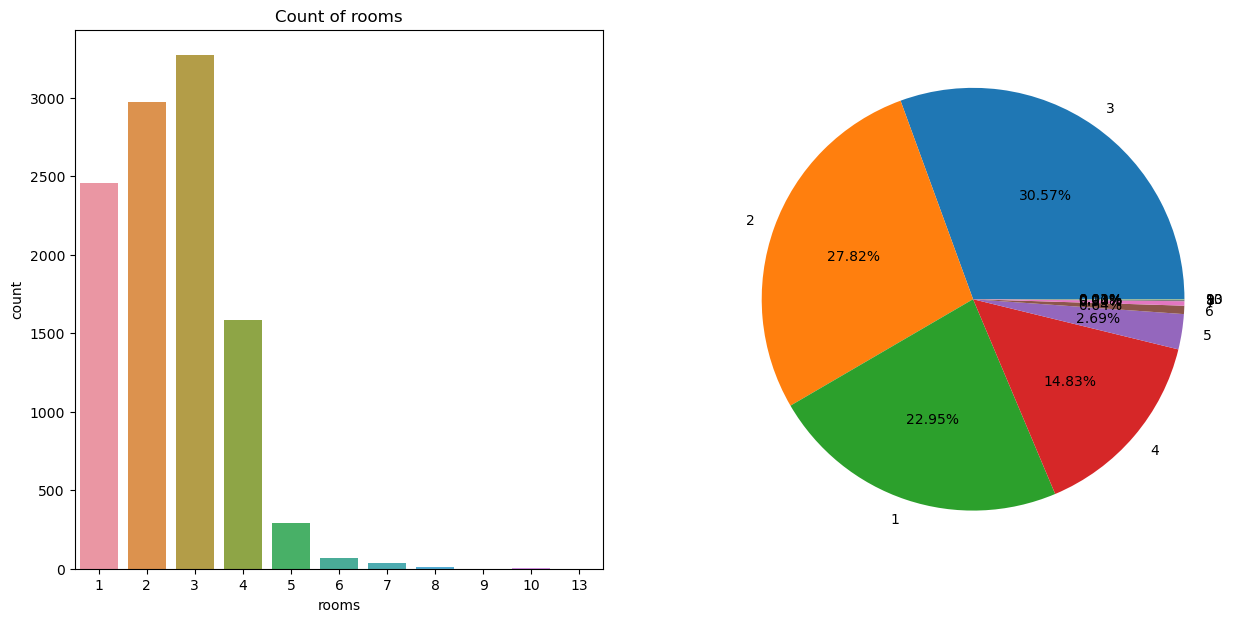

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of rooms")                  
percentage = house_data["rooms"].value_counts()        
labels = list(house_data["rooms"].value_counts().index) 

sns.countplot(x = house_data["rooms"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### Interpretation: There are more number of 3 room houses

### Analysis of city column

In [40]:
info_of_cat("animal")

Unique values in animal are: ['acept' 'not acept']
Mode of animal is acept
Number of missing values in animal is 0


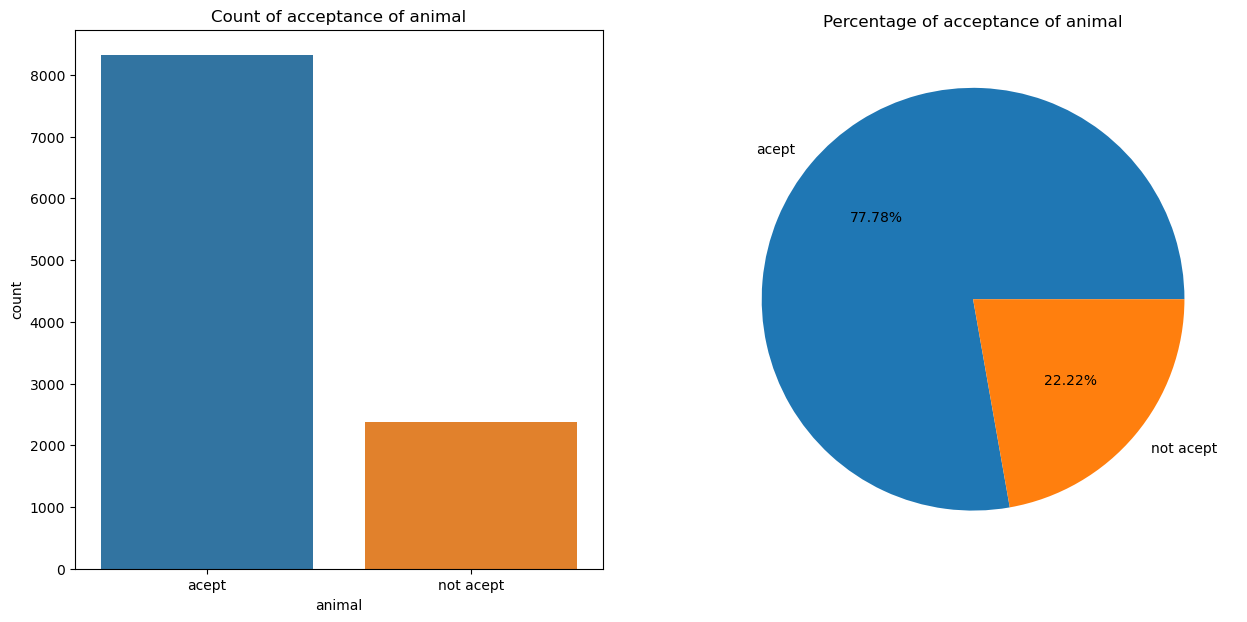

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of acceptance of animal")
ax[1].set_title("Percentage of acceptance of animal")  
percentage = house_data["animal"].value_counts()        
labels = list(house_data["animal"].value_counts().index) 

sns.countplot(x = house_data["animal"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### Interpretation: By observing above graph we conclude that most of the properties available for sale accept animals

### Analysis of bathroom column

In [48]:
info_of_cat("bathroom")

Unique values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
Mode of bathroom is 1
Number of missing values in bathroom is 0


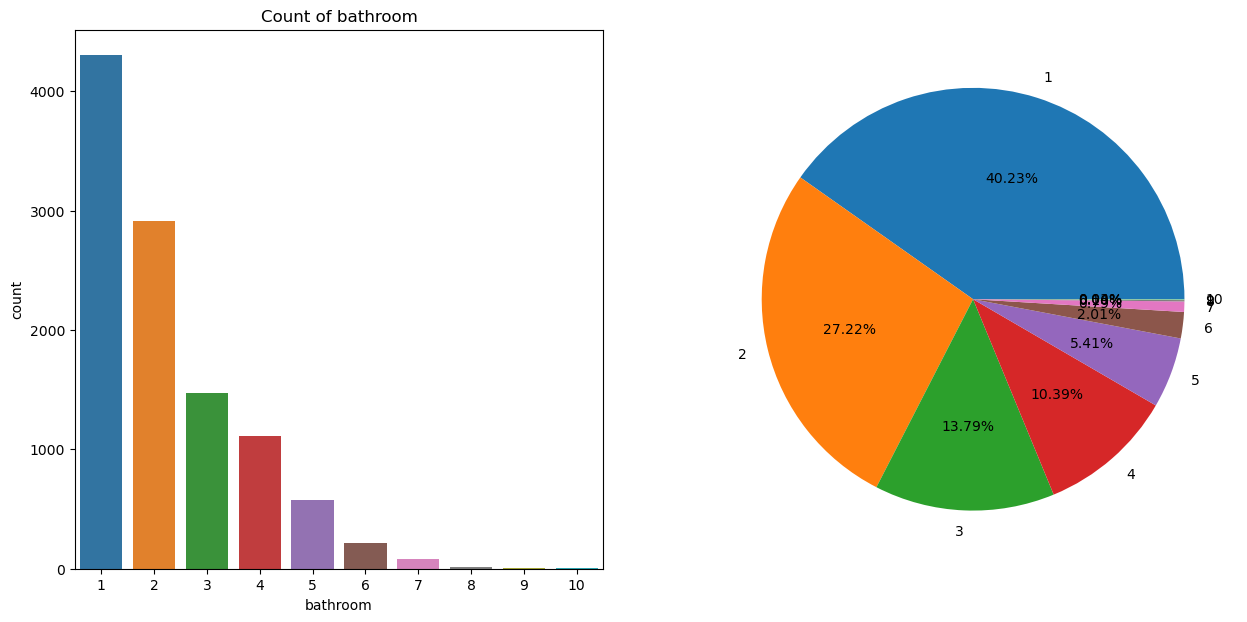

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of bathroom")                  
percentage = house_data["bathroom"].value_counts()        
labels = list(house_data["bathroom"].value_counts().index) 

sns.countplot(x = house_data["bathroom"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### By observing we conclude that most of the houses available for sale have mostly  1 bathroom

## Analysis of furniture column

In [37]:
info_of_cat("furniture")

Unique values in furniture are: ['furnished' 'not furnished']
Mode of furniture is not furnished
Number of missing values in furniture is 0


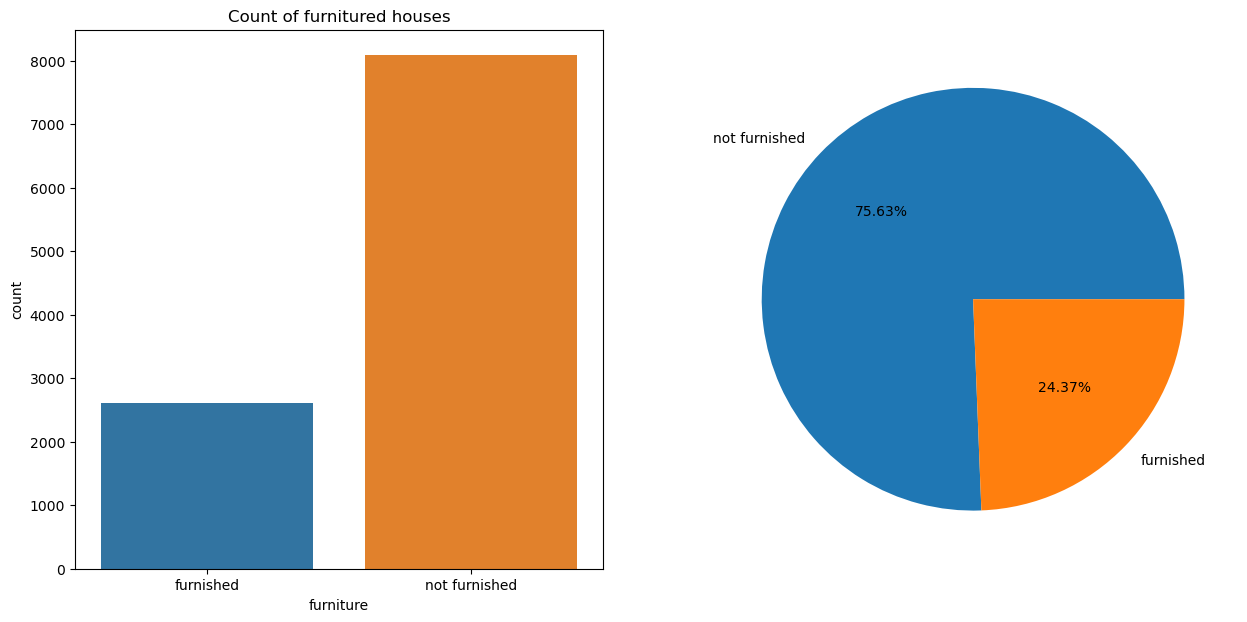

In [4]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of furnitured houses")                  
percentage = house_data["furniture"].value_counts()        
labels = list(house_data["furniture"].value_counts().index) 

sns.countplot(x = house_data["furniture"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### Interpretation:  By observing above graph we conclude that most of the propeties available for sale are Not furnished 

### Analysis of parking spaces column

In [37]:
info_of_cat("parking spaces")

Unique values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
Mode of parking spaces is 1
Number of missing values in parking spaces is 0


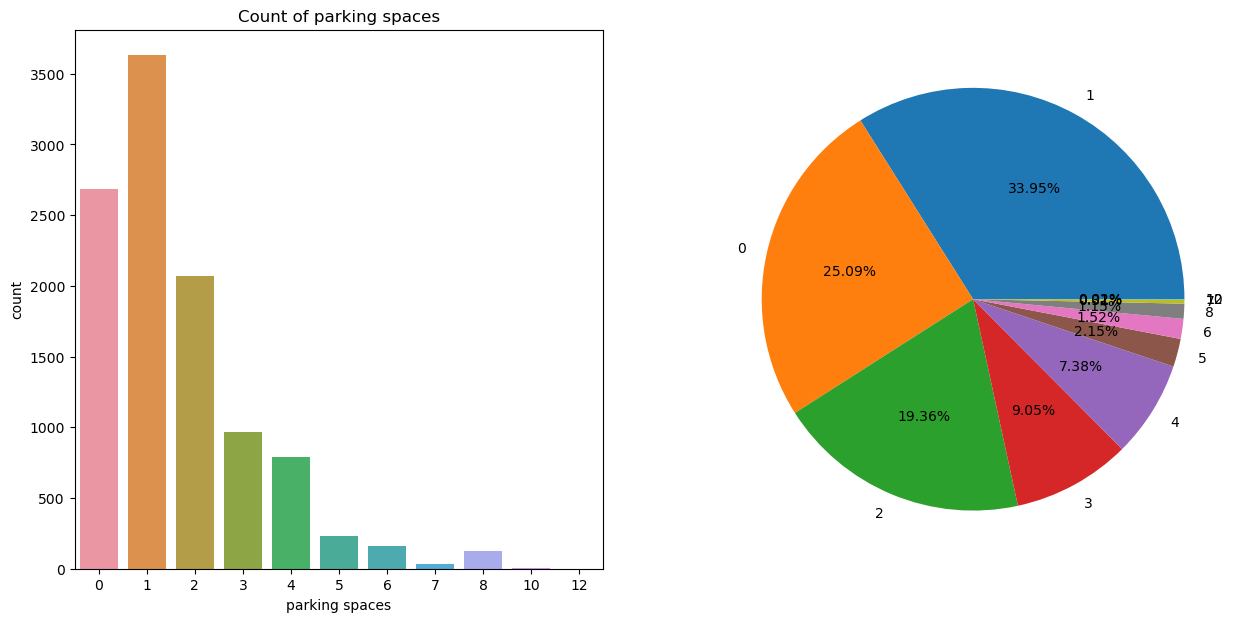

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of parking spaces")                  
percentage = house_data["parking spaces"].value_counts()        
labels = list(house_data["parking spaces"].value_counts().index) 

sns.countplot(x = house_data["parking spaces"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

### Interpretation: Most of houses have only 1 parking spaces

##  Univeriate analysis of continuous column

In [12]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {house_data[col].mean()}")
    print(f"The median of the {col} is {house_data[col].median()}")
    print(f"The mode of the {col} is {house_data[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {house_data[col].std()}")
    print(f"Number of missing values in the {col} is {house_data[col].isnull().sum()}")

### Analysis of  rent amount (R$) column

In [13]:
info_of_numerical("rent amount (R$)")

The mean of the rent amount (R$) is 3896.247194163861
The median of the rent amount (R$) is 2661.0
The mode of the rent amount (R$) is 2500
The standard deviation of the rent amount (R$) is 3408.5455176710816
Number of missing values in the rent amount (R$) is 0


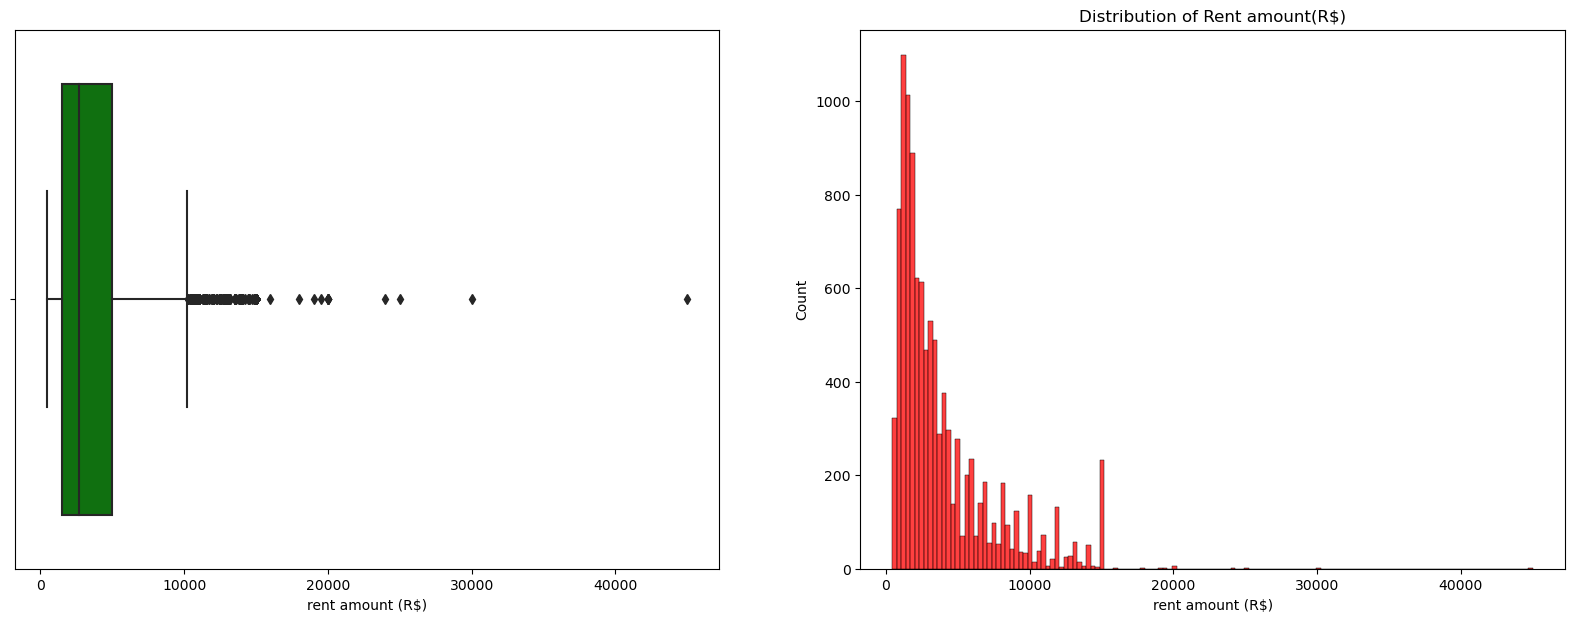

In [14]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = house_data["rent amount (R$)"], ax =ax[1], color = "r") 
sns.boxplot(x = house_data["rent amount (R$)"], ax = ax[0], color = "g") 
plt.title("Distribution of Rent amount(R$)")
plt.show()

### There are outliers in the data . so we need to perform outlier treatment

In [15]:
mean = int(house_data["rent amount (R$)"].mean())
x = house_data[house_data["rent amount (R$)"] > 10000].index
for index in x:
    house_data.loc[index, "rent amount (R$)"] = mean

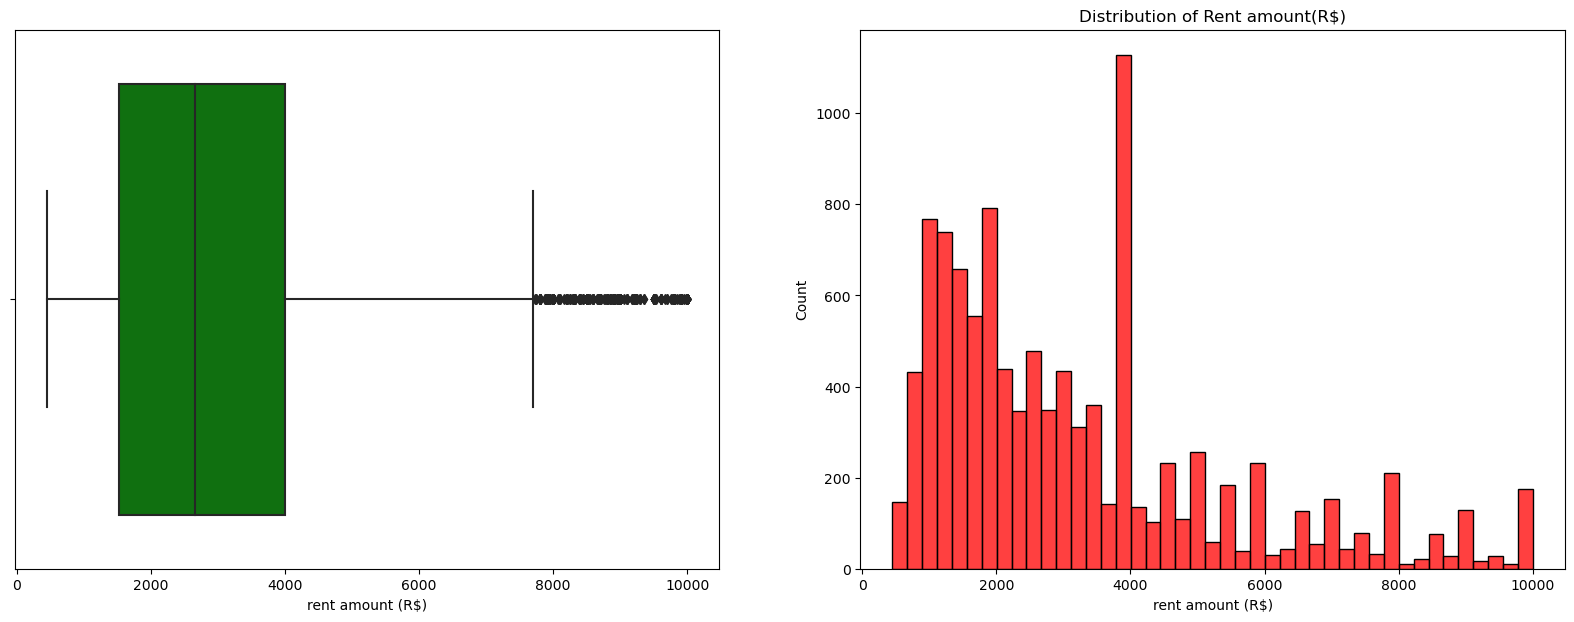

In [18]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = house_data["rent amount (R$)"], ax =ax[1], color = "r") 
sns.boxplot(x = house_data["rent amount (R$)"], ax = ax[0], color = "g") 
plt.title("Distribution of Rent amount(R$)")
plt.show()

### Interpretation:  The maximum rent is rs.4000

### Analysis of property tax (R$)

In [22]:
info_of_numerical("property tax (R$)")

The mean of the property tax (R$) is 366.70435839880287
The median of the property tax (R$) is 125.0
The mode of the property tax (R$) is 0
The standard deviation of the property tax (R$) is 3107.832321161917
Number of missing values in the property tax (R$) is 0


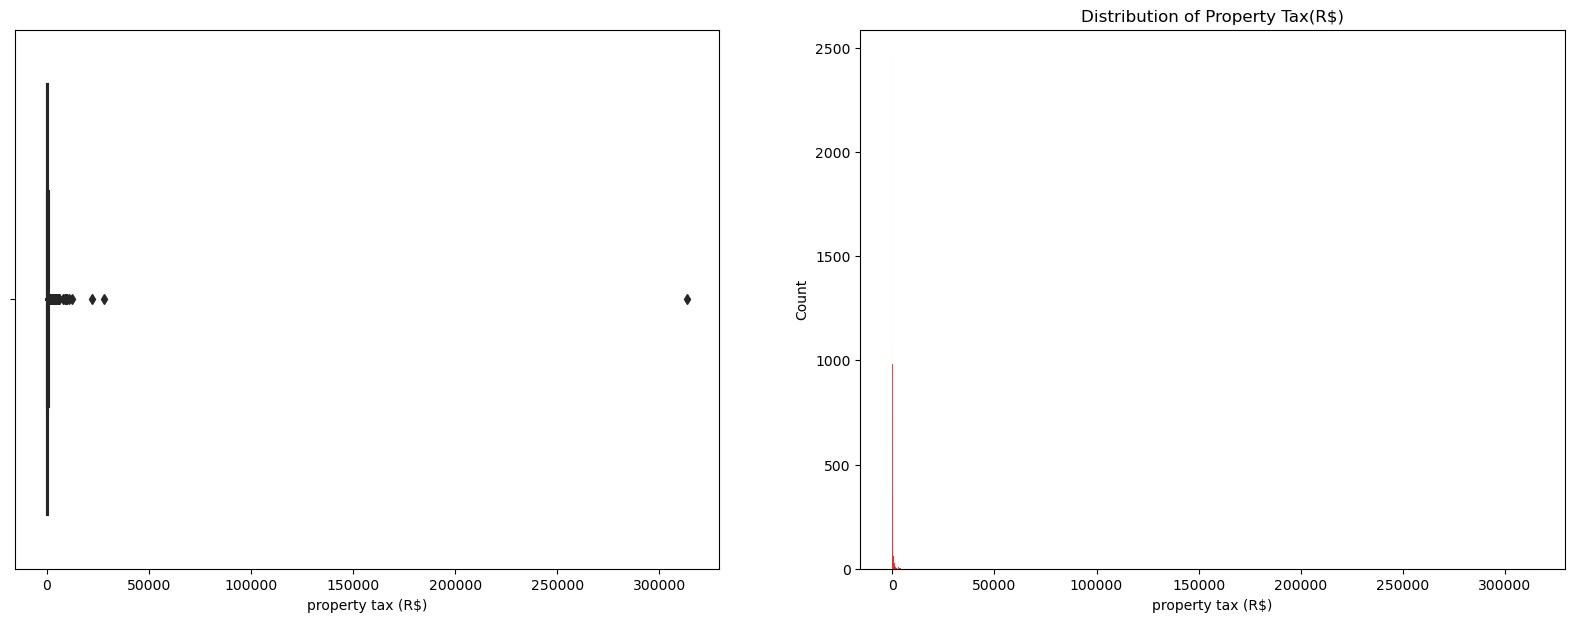

In [3]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = house_data["property tax (R$)"], ax =ax[1], color = "r") 
sns.boxplot(x = house_data["property tax (R$)"], ax = ax[0], color = "g") 
plt.title("Distribution of Property Tax(R$)")
plt.show()

### There are outliers in the data . so we need to perform outlier treatment

In [8]:
Q1=house_data['property tax (R$)'].quantile(0.25)
Q3=house_data['property tax (R$)'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

house_data.loc[(house_data['property tax (R$)']<lower_bound) | (house_data['property tax (R$)']>upper_bound), 'property tax (R$)']=np.nan

clean_value=house_data[(house_data['property tax (R$)'].notnull())]['property tax (R$)']
house_data['property tax (R$)'].fillna(clean_value,inplace=True)

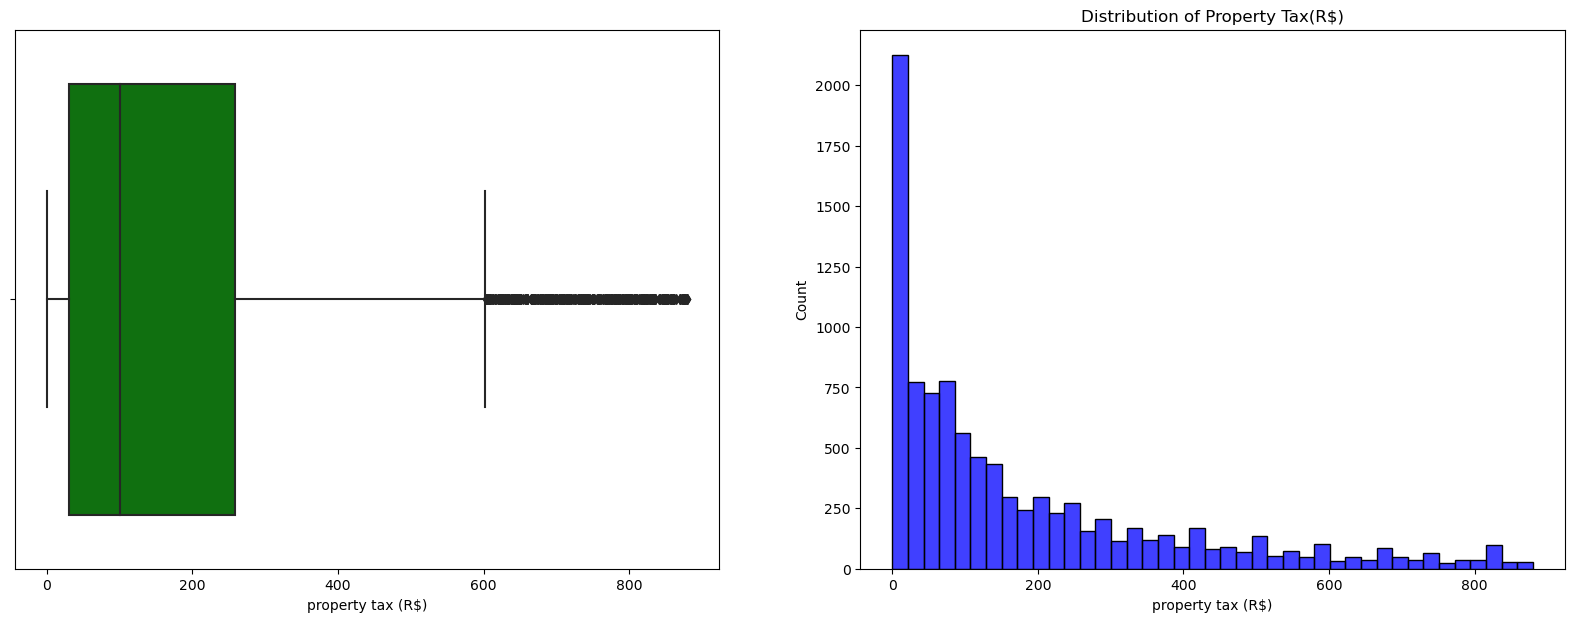

In [10]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = house_data["property tax (R$)"], ax =ax[1], color = "b") 
sns.boxplot(x = house_data["property tax (R$)"], ax = ax[0], color = "g")
plt.title("Distribution of Property Tax(R$)")
plt.show()

### Interpretation: By observing above graph we conclude that the houses available for rent have 0 property tax

## Analysis of total(R$) column

In [26]:
info_of_numerical("total (R$)")

The mean of the total (R$) is 5490.4869996258885
The median of the total (R$) is 3581.5
The mode of the total (R$) is 2555
The standard deviation of the total (R$) is 16484.72591235027
Number of missing values in the total (R$) is 0


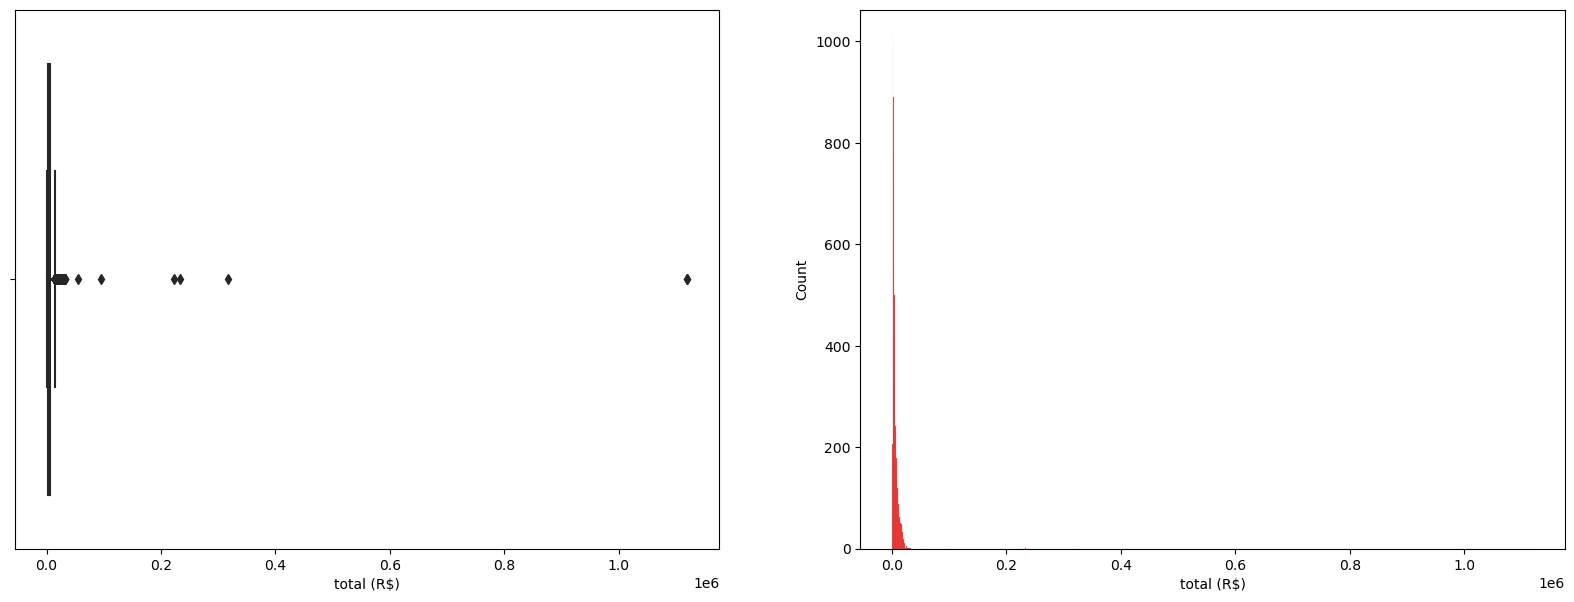

In [20]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = house_data["total (R$)"], ax =ax[1], color = "r") 
sns.boxplot(x = house_data["total (R$)"], ax = ax[0], color = "g") 
plt.show()

### There are outliers in the data so we need to perform oulier analysis

In [21]:
Q1=house_data['total (R$)'].quantile(0.25)
Q3=house_data['total (R$)'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

house_data.loc[(house_data['total (R$)']<lower_bound) | (house_data['total (R$)']>upper_bound), 'total (R$)']=np.nan

clean_value=house_data[(house_data['total (R$)'].notnull())]['total (R$)']
house_data['total (R$)'].fillna(clean_value,inplace=True)

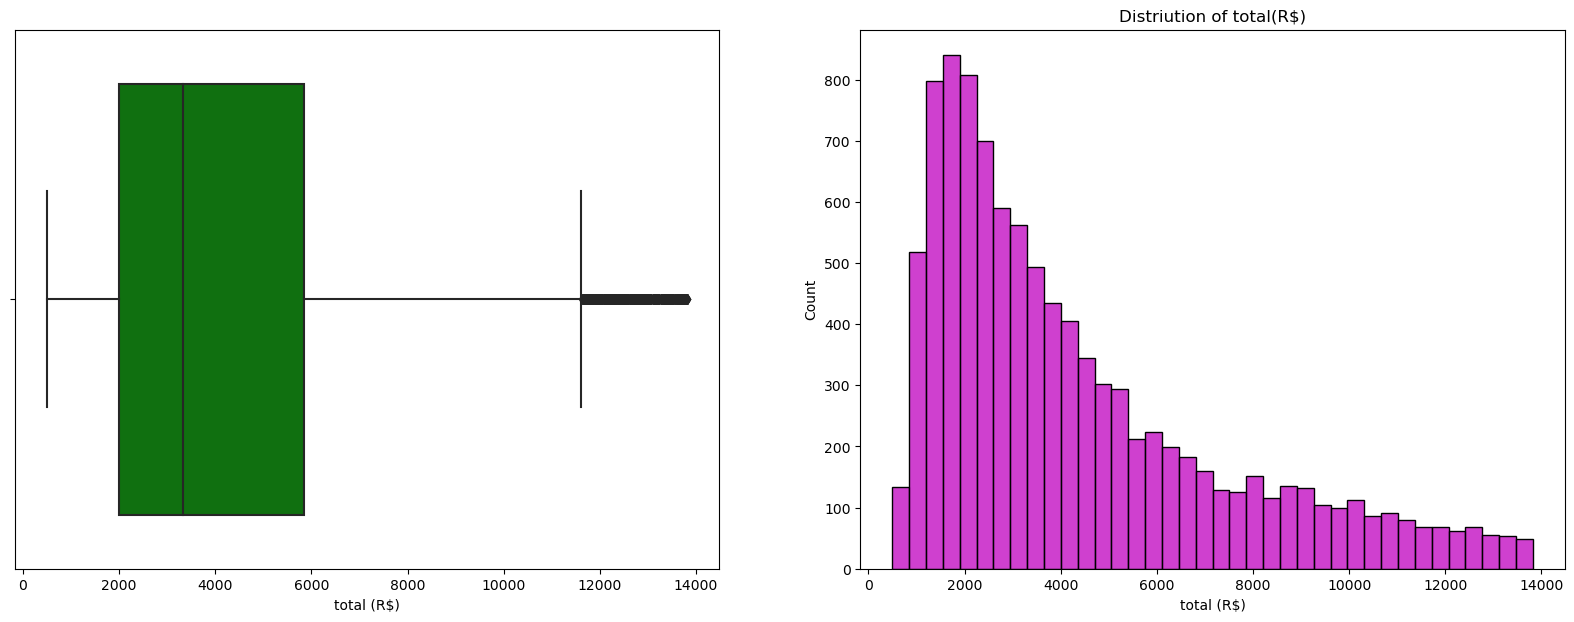

In [24]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = house_data["total (R$)"], ax =ax[1], color = "m") 
sns.boxplot(x = house_data["total (R$)"], ax = ax[0], color = "g") 
plt.title("Distriution of total(R$)")
plt.show()

### Interpretation: By observing the graph we can conclude that R$ 2000 is the common total cost value for the properties.

## Analysis of area column

In [30]:
info_of_numerical("area")

The mean of the area is 149.21791994014217
The median of the area is 90.0
The mode of the area is 50
The standard deviation of the area is 537.0169423364867
Number of missing values in the area is 0


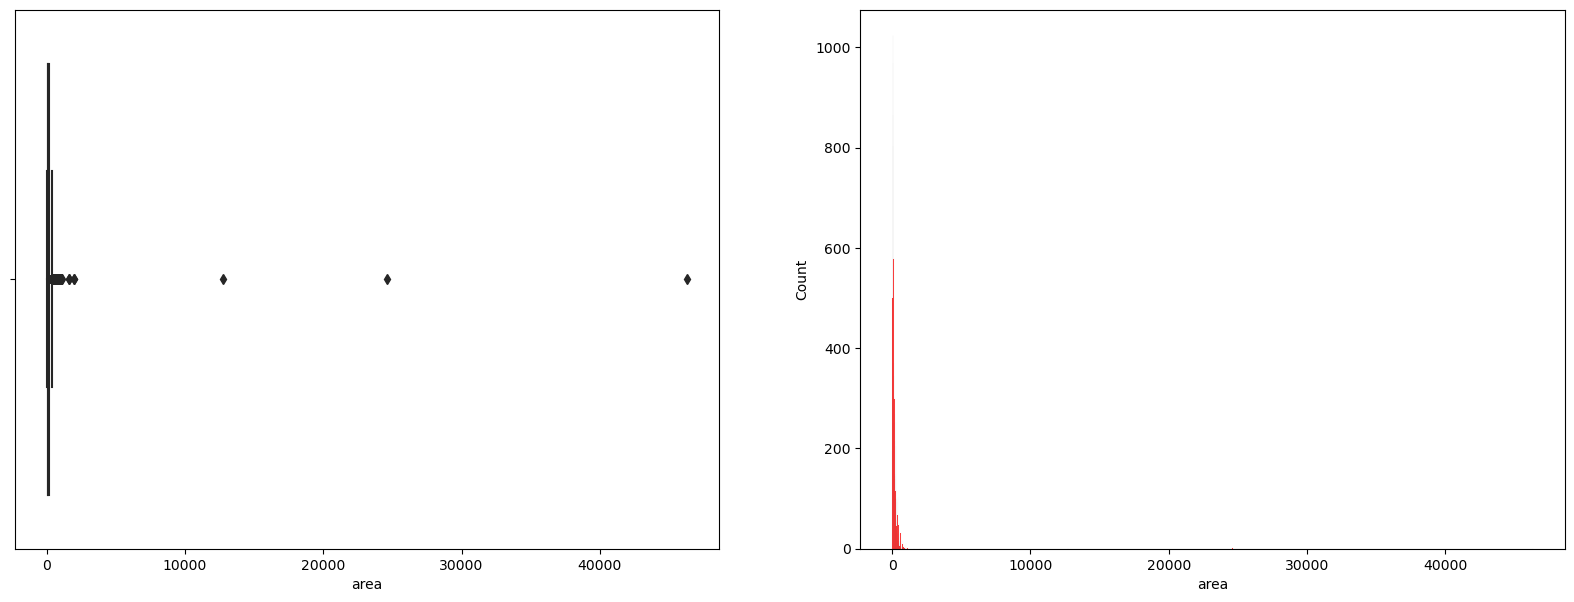

In [25]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = house_data["area"], ax =ax[1], color = "r") 
sns.boxplot(x = house_data["area"], ax = ax[0], color = "g") 
plt.show()

### There are outliers in the data so we need to perform outlier analysis

In [26]:
Q1=house_data['area'].quantile(0.25)
Q3=house_data['area'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

house_data.loc[(house_data['area']<lower_bound) | (house_data['area']>upper_bound), 'area']=np.nan

clean_value=house_data[(house_data['area'].notnull())]['area']
house_data['area'].fillna(clean_value,inplace=True)

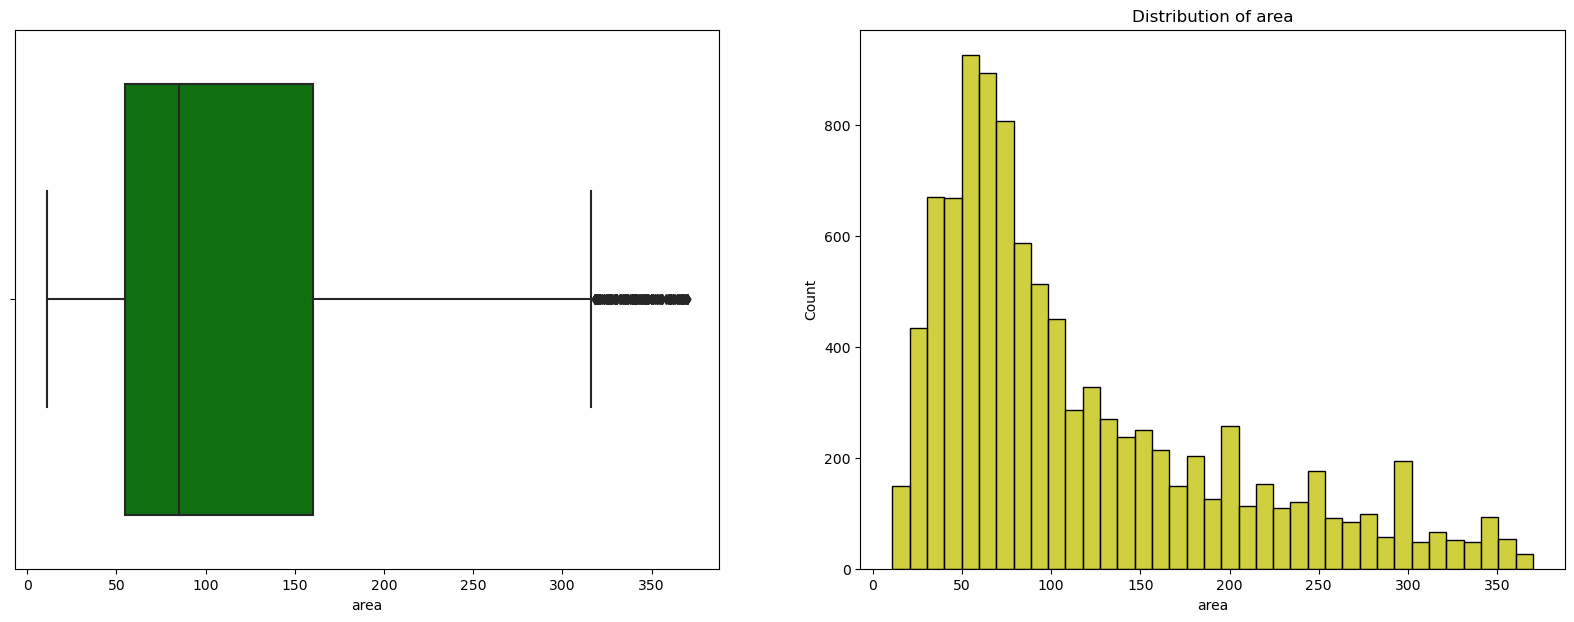

In [29]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = house_data["area"], ax =ax[1], color = "y") 
sns.boxplot(x = house_data["area"], ax = ax[0], color = "g")
plt.title("Distribution of area")
plt.show()

### By observing above graph we conclude that properties for rent have an area of 50 to 70 square meters

## Level 2.  Analysis

### Categorical to Categorical

## Relationship between cities and room

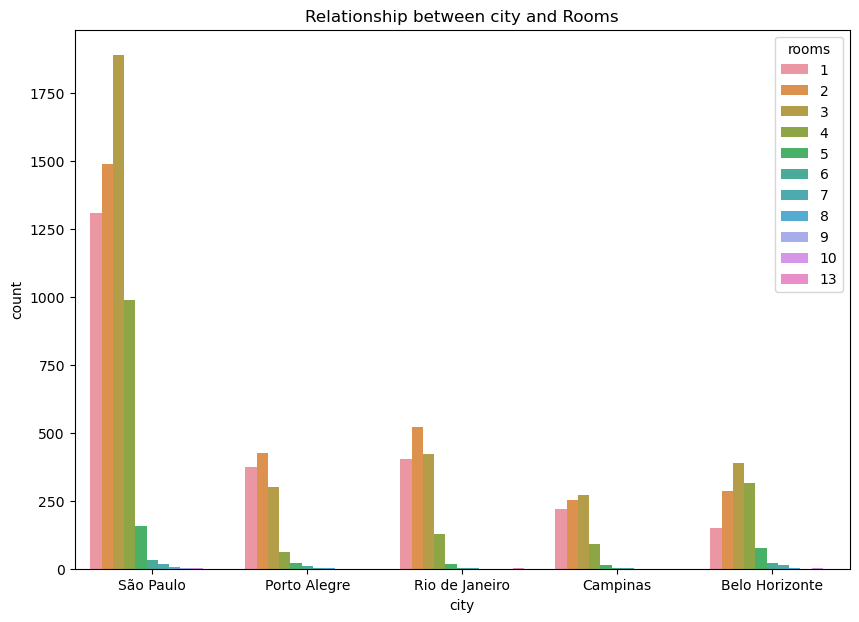

In [31]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "rooms", data = house_data)
plt.title("Relationship between city and Rooms")
plt.show()

### Interpretation: 
* As bachelors need only 1 or 2 rooms Porto Alegre city would be suitable for them
* Mid sized family needs 2 or 3 rooms so Campinas city would be suitable for them
* Large family needs more than 3 rooms so Belo Horizonte would be suitable for them|

## Relationship between cities and furniture

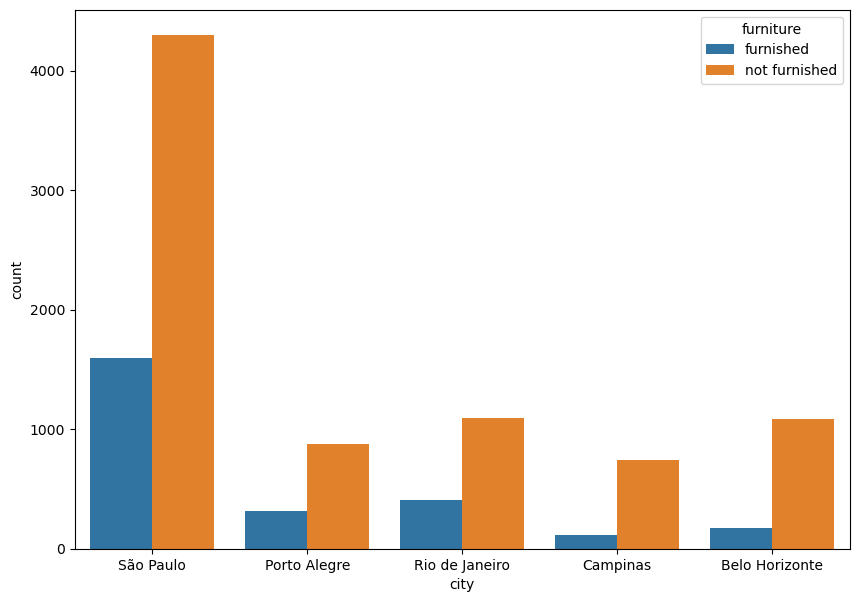

In [42]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "furniture", data = house_data)
plt.show()

### Interpretation:
* Bachelors donot need much furnished rooms so Belo Horizonte city would be suitable for them
* Furnished rooms are more available in Porto Alegre city so it would be suitable for midsized as well as large family

## Relationship between city and parking spaces

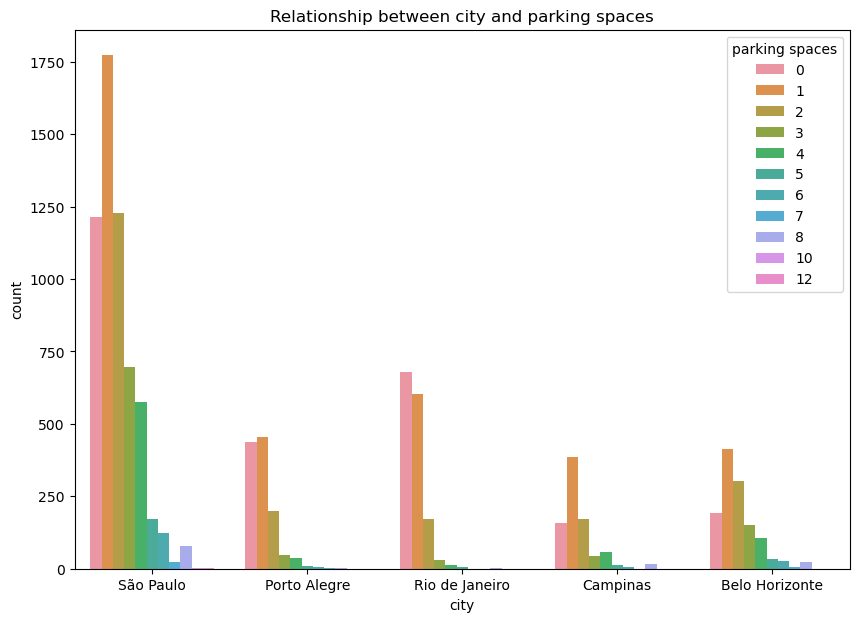

In [32]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "parking spaces", data = house_data)
plt.title("Relationship between city and parking spaces")
plt.show()

### Interpretation:
* 0 parking or 1 parking would be enough for bachelors therefore city Porto Alegere would be suitable as it have more number of 0 and 1 parking spaces.
* Midsized family and large sized family can have  2 or more vehicles Belo Horizonte city is suitable beacause parking areas are more avilable in houses availabe for rent.

### Relationship between cities and animal

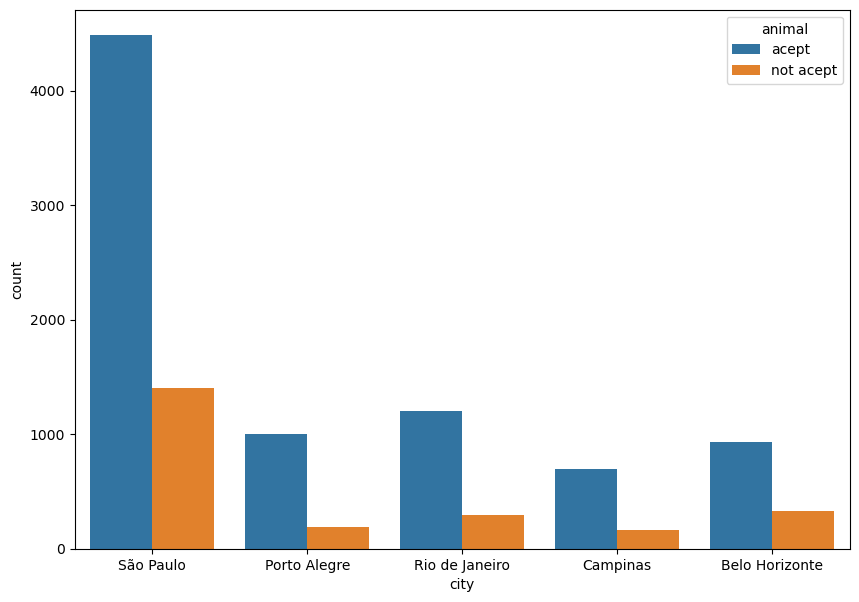

In [45]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "animal", data = house_data)
plt.show()

### Interpretation:
* Bachelors may not have pets with them so they need not to consider acceptance of pets so Belo Horizonte would be suitable
* Mid sized families and large families  can have pets with them so Porto Alegre would be suitable as this city have more number of house for rent which accepts pets.

## Relationship between city and bathroom

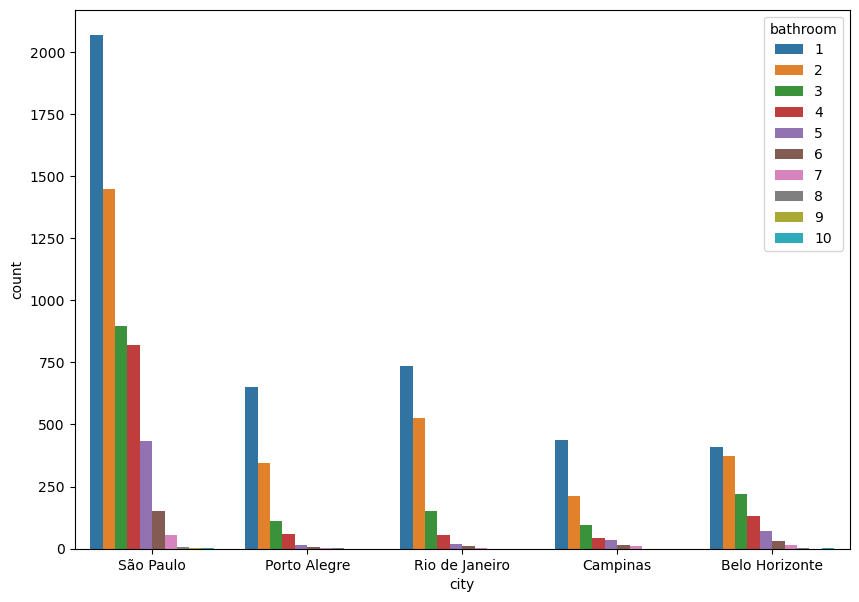

In [51]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = "city", hue = "bathroom", data = house_data)
plt.show()

### Interpretation:
* Bachelors need only one bathroom so Porto Alegre would be suitable for them  as most of the properties available for sale have 1 bathrooms.
* Belo Horizonte city would be suitable for midsized and large families as most of the properties available for sale have more than 2 bathrooms.

### Categorical to continuous

## Relationship between city and rent amount

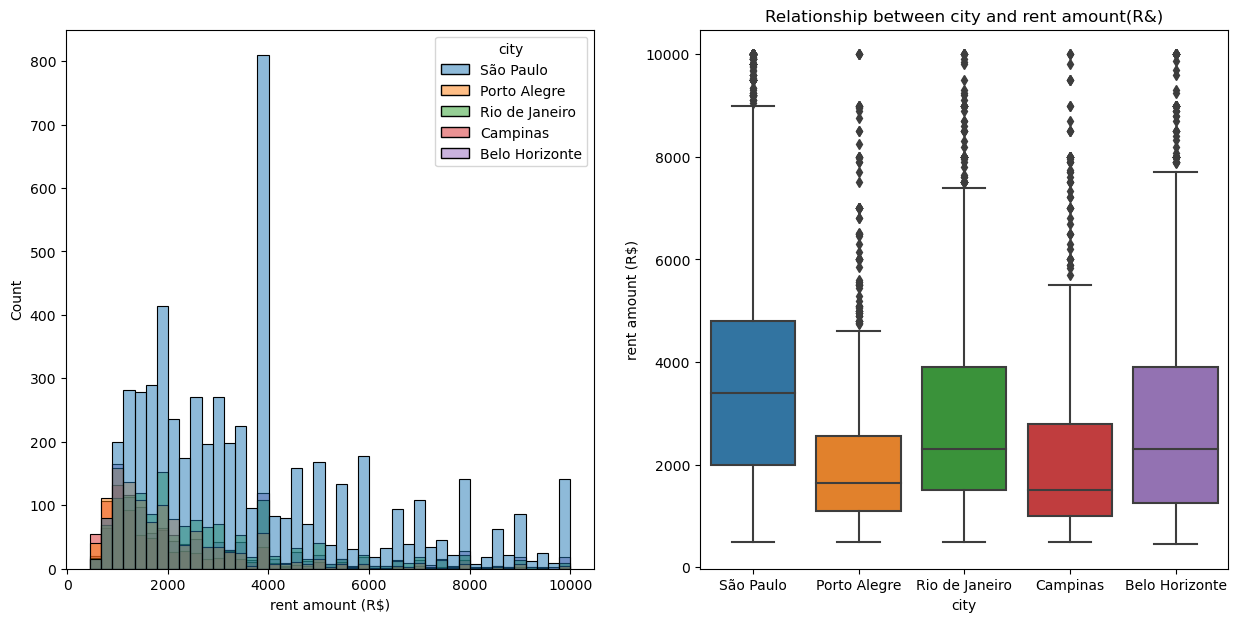

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = house_data["rent amount (R$)"], hue = house_data["city"], ax = ax[0])
sns.boxplot(x = house_data["city"] ,y = house_data["rent amount (R$)"] , ax = ax[1])
plt.title("Relationship between city and rent amount(R&)")
plt.show()

### Interpretation:
* Rent amount is less in Porto Alegre city so it would be suitable for bachelors.
* Rent amount is moderate in Porto Alegre and Campinas city so it would be suitable for mid sized and large family.

### Relationship between City and property tax

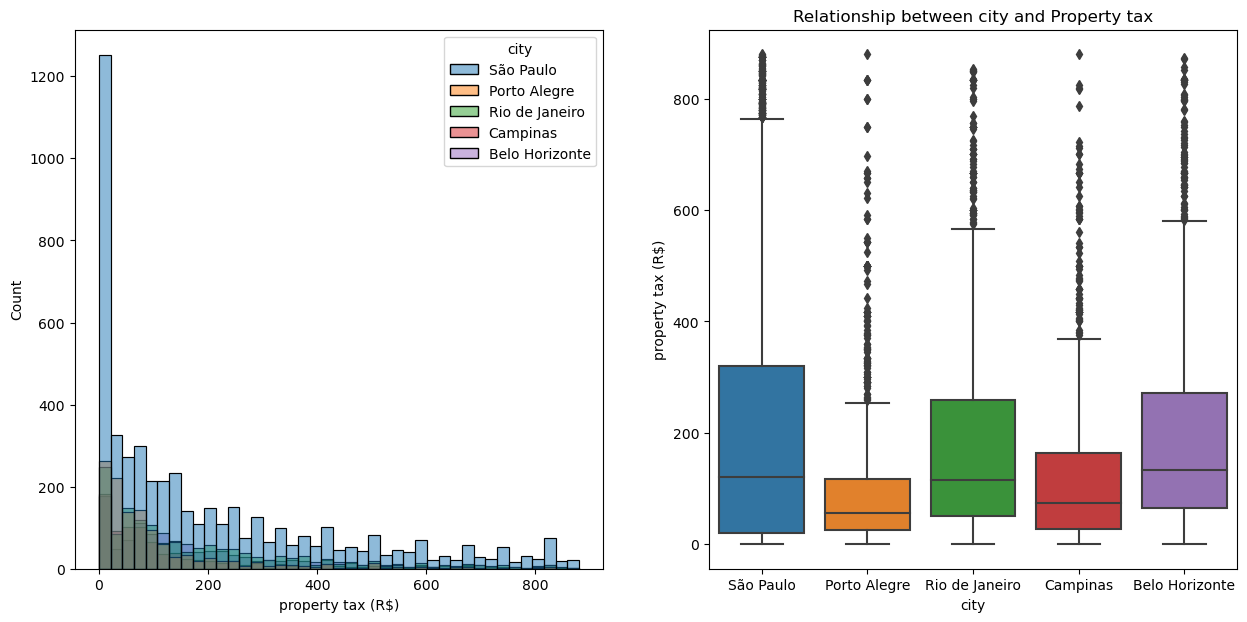

In [34]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = house_data["property tax (R$)"], hue = house_data["city"], ax = ax[0])
sns.boxplot(x = house_data["city"] ,y = house_data["property tax (R$)"] , ax = ax[1])
plt.title("Relationship between city and Property tax")
plt.show()

### Interpretation:
* Property tax is less in Porto Alegre city so it would be best for Bachelors.
* Property tax is moderate in Porto Alegre and Campinas city so it would be best for mid sized and large family.

   ### Relationship between City and total (R$)

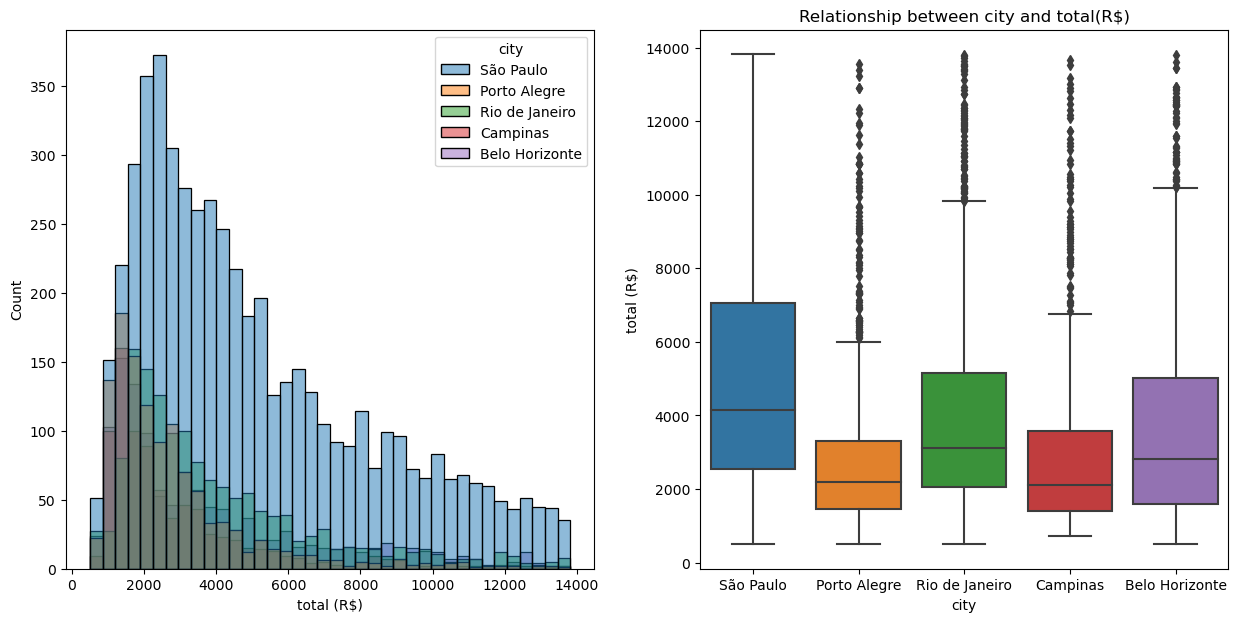

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = house_data["total (R$)"], hue = house_data["city"], ax = ax[0])
sns.boxplot(x = house_data["city"] ,y = house_data["total (R$)"] , ax = ax[1])
plt.title("Relationship between city and total(R$)")
plt.show()

### Interpretation:
* Total (Rs) rent for properties is less in Porto Alegre city so it would be suitable for Bachelors
* Total (Rs) rent for properties is moderate in Porto Alegre and Campinas city so it woulb be suitable for Mid sized and large family

### Relationship between city and area

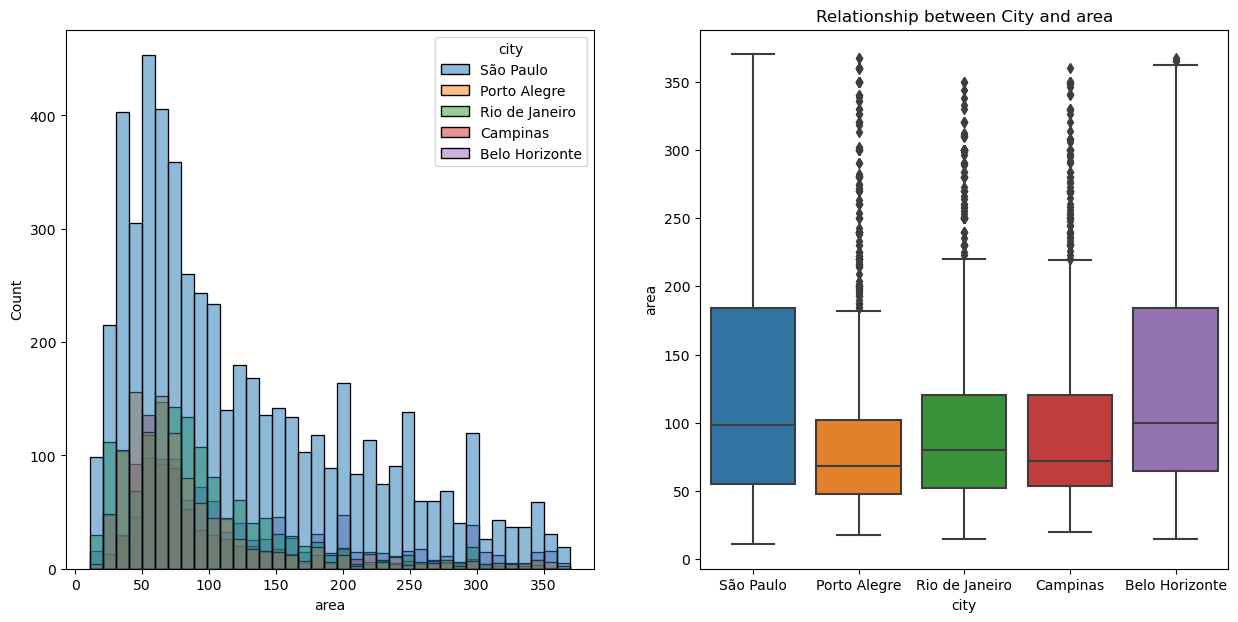

In [36]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = house_data["area"], hue = house_data["city"], ax = ax[0])
sns.boxplot(x = house_data["city"] ,y = house_data["area"] , ax = ax[1])
plt.title("Relationship between City and area")
plt.show()

### Interpretation:
* Bachelers donot need properties that are available for rent having large area so Porto Alegre would be suitable for them.
* Midsized family needs properties available for rent having medium area so Campinas would be suitable for them.
* Large sized family needs properties available for sale having large area so Belo Horizonte would be suitable for them.

### Conclusion:

* By the overall analysis we can conclude that Porto Alegre city will be suitable for bachelor to relocate because this city offers higher amount of properties that have one room,lower rent amount, small area, not much furnished houses which aligns the need of bachelors.
* Campinas city would be suitable for midsized family because this city offers houses that have more than two rooms, with acceptance of pets, houses with parking area, two or more bathroom, moderate rent which is suitable for midsized family.
* Belo Horizonte city and Campinas would be suitable for larged sized family because this city has houses that have more than three rooms, with acceptance of pets, houses with parking area, three or more bathroom, moderate rent which is suitable for large family. 
